In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

#Makes the diagrams look nice and shiny
plt.rcParams['figure.figsize']=(18,24)
plt.rcParams['axes.linewidth'] = 2
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=16)
plt.rc('legend', fontsize=14)
plt.rcParams['lines.markersize'] = 10
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.rcParams['xtick.major.size']=10
plt.rcParams['xtick.major.width']=2
plt.rcParams['ytick.major.size']=10
plt.rcParams['ytick.major.width']=2
plt.rcParams['legend.edgecolor']='k'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams["legend.framealpha"] = 1
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8
plt.rcParams['legend.handletextpad']=0.4
plt.rcParams['legend.columnspacing']=0.5
plt.rcParams['legend.labelspacing']=0.3
plt.rcParams['legend.title_fontsize'] = 14
plt.rcParams['axes.formatter.limits']=(-3, 6)


names=pd.read_csv('parameter_names.txt',sep='\t',header=None)
data=pd.read_csv('input.txt',sep='\t',header=None,names=names.to_numpy().T[0])

data

,111,100,211,110,O(111)a,O(111)b,OC(111)a,OC(111)b,O(100)a,O(100)b,...,C111_211,O100_211,CO100_211,C100_211,O111_110,CO111_110,C111_110,O100_110,CO100_110,C100_110
0,0.7925,0.1056,0.0513,0.0505,0.765625,0.765625,0.578125,0.046875,0.015625,0.859375,...,34.34,60.34,14.43,205.19,45.41,13.61,34.34,60.34,14.43,205.19
1,0.5696,0.3602,0.0357,0.0346,0.265625,0.265625,0.078125,0.546875,0.515625,0.359375,...,34.92,62.80,8.32,192.28,46.39,10.34,34.92,62.80,8.32,192.28
2,0.6804,0.1959,0.0623,0.0613,0.640625,0.390625,0.453125,0.921875,0.390625,0.984375,...,36.08,66.44,7.66,185.40,48.56,11.39,36.08,66.44,7.66,185.40
3,0.1965,0.7164,0.0445,0.0426,0.140625,0.890625,0.953125,0.421875,0.890625,0.484375,...,32.15,62.59,11.22,210.87,43.33,13.24,32.15,62.59,11.22,210.87
4,0.7196,0.2169,0.0321,0.0314,0.890625,0.640625,0.203125,0.171875,0.640625,0.734375,...,34.40,65.07,9.34,198.30,49.80,11.89,34.40,65.07,9.34,198.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19412,0.8603,0.0664,0.0537,0.0195,0.925385,0.667328,0.473175,0.988556,0.573761,0.485077,...,34.66,61.97,9.13,203.03,41.56,10.30,34.66,61.97,9.13,203.03
19413,0.7194,0.1912,0.0435,0.0459,0.175385,0.917328,0.723175,0.738556,0.823761,0.735077,...,34.63,73.11,15.30,225.91,43.78,12.53,34.63,73.11,15.30,225.91
19414,0.7009,0.2089,0.0445,0.0457,0.675385,0.417328,0.223175,0.238556,0.323761,0.235077,...,34.88,64.08,7.06,190.44,45.96,10.18,34.88,64.08,7.06,190.44
19415,0.8822,0.0625,0.0341,0.0211,0.019135,0.823578,0.629425,0.394806,0.605011,0.016327,...,33.65,63.35,5.61,181.02,45.69,9.86,33.65,63.35,5.61,181.02


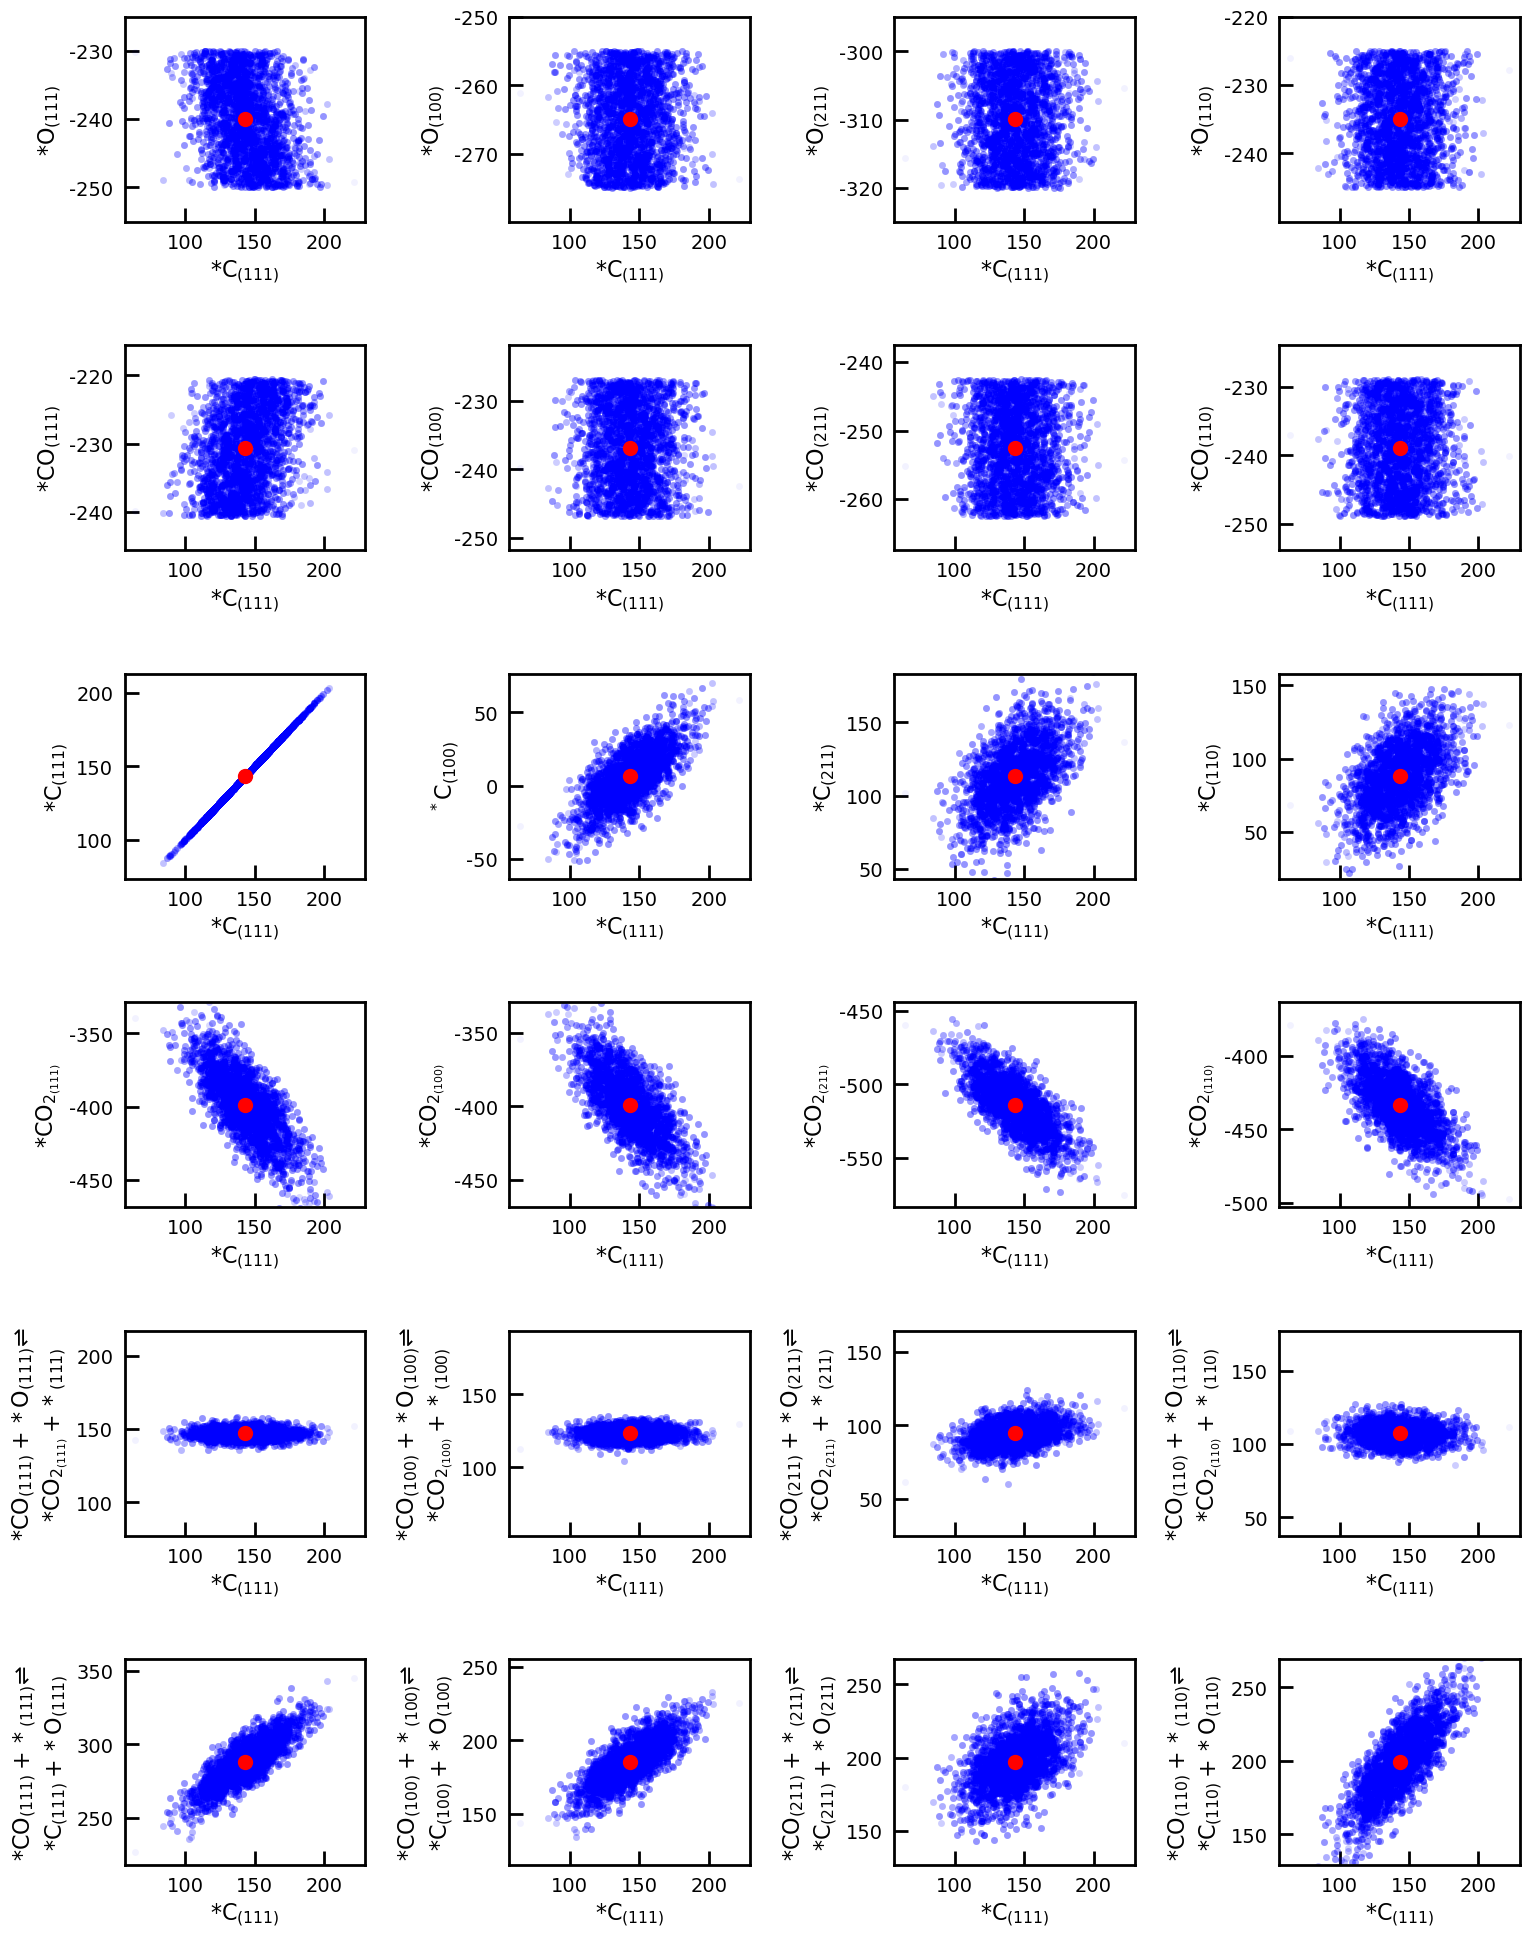

In [2]:
ax = []
fig, axs = plt.subplots(nrows=6, ncols=4)
fig.subplots_adjust(hspace=0.6, wspace=0.6)
for i, row in enumerate(axs):
    for j, a in enumerate(row):
        ax.append(a)

        
names=np.arange(0,24)
names=names.reshape(6,4)        
        
params111=np.array(['O(111)','OC(111)','C(111)','CO2(111)','CO2diss(111)','COdiss(111)'])
params100=np.array(['O(100)','OC(100)','C(100)','CO2(100)','CO2diss(100)','COdiss(100)'])
params211=np.array(['O(211)','OC(211)','C(211)','CO2(211)','CO2diss(211)','COdiss(211)'])
params110=np.array(['O(110)','OC(110)','C(110)','CO2(110)','CO2diss(110)','COdiss(110)'])

param_names111=np.array(['$\mathrm{*O_{(111)}}$','$\mathrm{*CO_{(111)}}$','$\mathrm{*C_{(111)}}$',
                         '$\mathrm{*CO_{2_{(111)}}}$','$\mathrm{*CO_{(111)}+*O_{(111)}\u21cc}$\n$\mathrm{*CO_{2_{(111)}}+*_{(111)}}$',
                         '$\mathrm{*CO_{(111)}+*_{(111)}\u21cc}$\n$\mathrm{*C_{(111)}+*O_{(111)}}$'])
param_names100=np.array(['$\mathrm{*O_{(100)}}$','$\mathrm{*CO_{(100)}}$','$\mathrm{^*C_{(100)}}$',
                         '$\mathrm{*CO_{2_{(100)}}}$','$\mathrm{*CO_{(100)}+*O_{(100)}\u21cc}$\n$\mathrm{*CO_{2_{(100)}}+*_{(100)}}$',
                         '$\mathrm{*CO_{(100)}+*_{(100)}\u21cc}$\n$\mathrm{*C_{(100)}+*O_{(100)}}$'])
param_names211=np.array(['$\mathrm{*O_{(211)}}$','$\mathrm{*CO_{(211)}}$','$\mathrm{*C_{(211)}}$',
                         '$\mathrm{*CO_{2_{(211)}}}$','$\mathrm{*CO_{(211)}+*O_{(211)}\u21cc}$\n$\mathrm{*CO_{2_{(211)}}+*_{(211)}}$',
                         '$\mathrm{*CO_{(211)}+*_{(211)}\u21cc}$\n$\mathrm{*C_{(211)}+*O_{(211)}}$'])
param_names110=np.array(['$\mathrm{*O_{(110)}}$','$\mathrm{*CO_{(110)}}$','$\mathrm{*C_{(110)}}$',
                         '$\mathrm{*CO_{2_{(110)}}}$','$\mathrm{*CO_{(110)}+*O_{(110)}\u21cc}$\n$\mathrm{*CO_{2_{(110)}}+*_{(110)}}$',
                         '$\mathrm{*CO_{(110)}+*_{(110)}\u21cc}$\n$\mathrm{*C_{(110)}+*O_{(110)}}$'])


params=np.c_[params111.T,params100.T,params211.T,params110.T]

param_names=np.c_[param_names111.T,param_names100.T,param_names211.T,param_names110.T]

for k in range(24):
    col=int(np.where(names==k)[0])
    row=int(np.where(names==k)[1])
    axs[col,row].plot(data['C(111)'], data[str(params[col,row])],  color='b', marker='o', 
                    linestyle='None', markersize=5, alpha=0.05,markeredgewidth=0, rasterized=True)
    axs[col,row].plot(np.mean(data['C(111)']),np.mean(data[str(params[col,row])]), color='r', marker='o')
    
    if str(params[col,row]).startswith('O'):
        axs[col,row].set_ylim([np.mean(data[str(params[col,row])])-15,np.mean(data[str(params[col,row])])+15 ])
    else:
        axs[col,row].set_ylim([np.mean(data[str(params[col,row])])-70,np.mean(data[str(params[col,row])])+70 ])
 
    axs[col,row].set_xlabel('$\mathrm{*C_{(111)}}$')
    axs[col,row].set_ylabel(param_names[col,row])

plt.savefig('energetic_parameters.png', dpi=400, transparent=False, bbox_inches='tight')
plt.show()

<ipython-input-11-80703ca066fb>:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  col=int(np.where(names==k)[1])
<ipython-input-11-80703ca066fb>:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  row=int(np.where(names==k)[0])


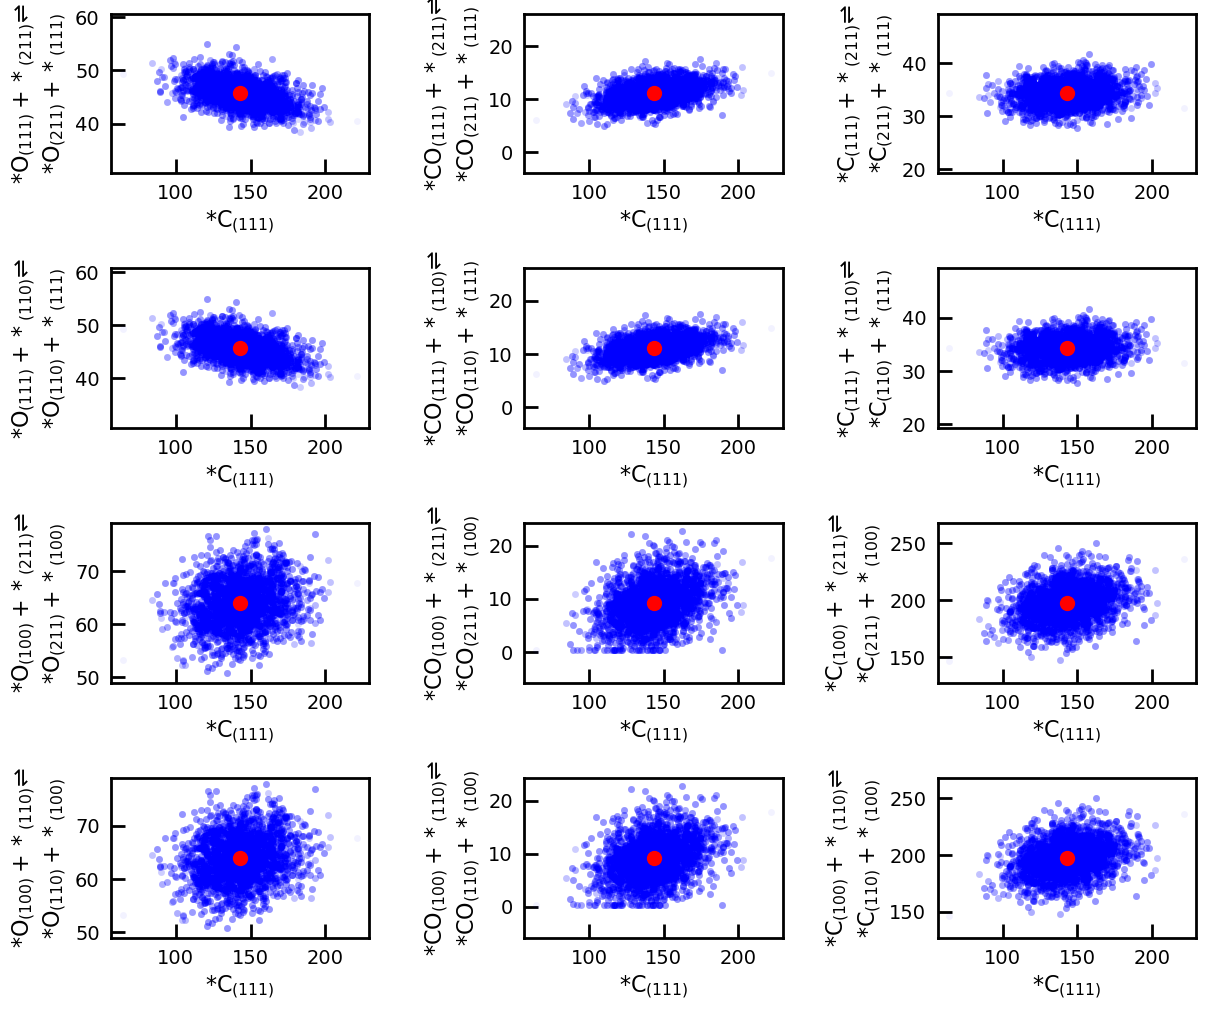

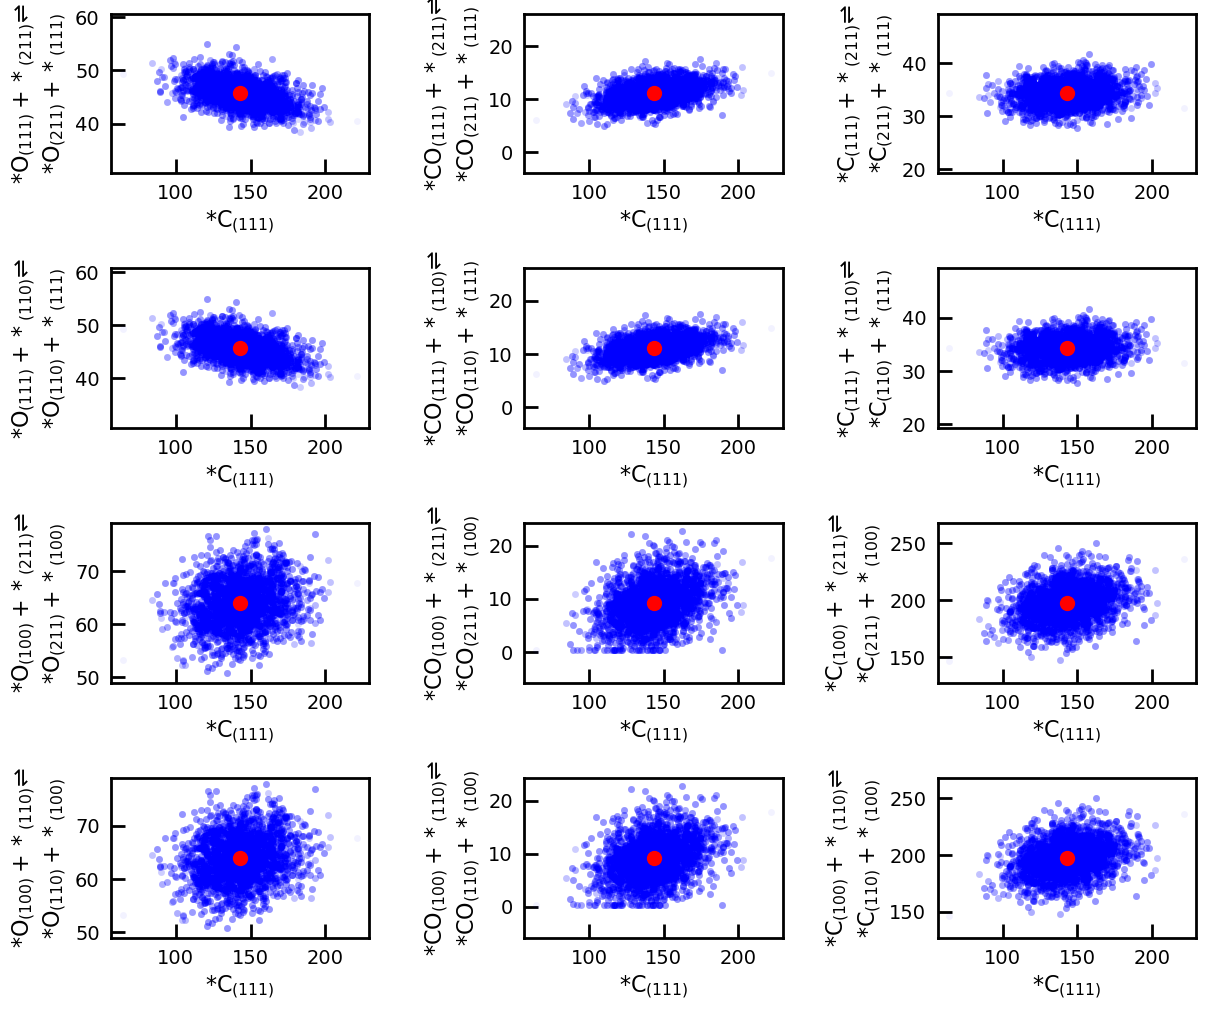

In [11]:
plt.rcParams['figure.figsize']=(14,12)

ax = []
fig, axs = plt.subplots(nrows=4, ncols=3)
fig.subplots_adjust(hspace=0.6, wspace=0.6)
for i, row in enumerate(axs):
    for j, a in enumerate(row):
        ax.append(a)

        
names=np.arange(0,24)
names=names.reshape(6,4)        
        
params111_211=np.array(['O111_211','CO111_211','C111_211'])
params111_110=np.array(['O111_110','CO111_110','C111_110'])
params100_211=np.array(['O100_211','CO100_211','C100_211'])
params100_110=np.array(['O100_110','CO100_110','C100_110'])

params=np.c_[params111_211,params111_110,params100_211,params100_110].T

param_names111_211=np.array(['$\mathrm{*O_{(111)}+*_{(211)}\u21cc}$\n$\mathrm{*O_{(211)}+*_{(111)}}$',
                         '$\mathrm{*CO_{(111)}+*_{(211)}\u21cc}$\n$\mathrm{*CO_{(211)}+*_{(111)}}$',
                           '$\mathrm{*C_{(111)}+*_{(211)}\u21cc}$\n$\mathrm{*C_{(211)}+*_{(111)}}$'])
param_names111_110=np.array(['$\mathrm{*O_{(111)}+*_{(110)}\u21cc}$\n$\mathrm{*O_{(110)}+*_{(111)}}$',
                         '$\mathrm{*CO_{(111)}+*_{(110)}\u21cc}$\n$\mathrm{*CO_{(110)}+*_{(111)}}$',
                           '$\mathrm{*C_{(111)}+*_{(110)}\u21cc}$\n$\mathrm{*C_{(110)}+*_{(111)}}$'])
param_names100_211=np.array(['$\mathrm{*O_{(100)}+*_{(211)}\u21cc}$\n$\mathrm{*O_{(211)}+*_{(100)}}$',
                         '$\mathrm{*CO_{(100)}+*_{(211)}\u21cc}$\n$\mathrm{*CO_{(211)}+*_{(100)}}$',
                           '$\mathrm{*C_{(100)}+*_{(211)}\u21cc}$\n$\mathrm{*C_{(211)}+*_{(100)}}$'])
param_names100_110=np.array(['$\mathrm{*O_{(100)}+*_{(110)}\u21cc}$\n$\mathrm{*O_{(110)}+*_{(100)}}$',
                         '$\mathrm{*CO_{(100)}+*_{(110)}\u21cc}$\n$\mathrm{*CO_{(110)}+*_{(100)}}$',
                           '$\mathrm{*C_{(100)}+*_{(110)}\u21cc}$\n$\mathrm{*C_{(110)}+*_{(100)}}$'])

param_names=np.c_[param_names111_211,param_names111_110,param_names100_211,param_names100_110].T

for k in range(12):
    col=int(np.where(names==k)[1])
    row=int(np.where(names==k)[0])
    axs[col,row].plot(data['C(111)'], data[str(params[col,row])],  color='b', marker='o', 
                    linestyle='None', markersize=5, alpha=0.05,markeredgewidth=0, rasterized=True)
    axs[col,row].plot(np.mean(data['C(111)']),np.mean(data[str(params[col,row])]), color='r', marker='o')
    
    if str(params[col,row]).startswith('O') or str(params[col,row]).startswith('CO') or str(params[col,row]).startswith('C111'):
        axs[col,row].set_ylim([np.mean(data[str(params[col,row])])-15,np.mean(data[str(params[col,row])])+15 ])
    else:
        axs[col,row].set_ylim([np.mean(data[str(params[col,row])])-70,np.mean(data[str(params[col,row])])+70 ])
        
    axs[col,row].set_xlabel('$\mathrm{*C_{(111)}}$')    
    axs[col,row].set_ylabel(param_names[col,row])
    
plt.savefig('diffusion_reactions.png', dpi=400, transparent=False, bbox_inches='tight')
plt.show()

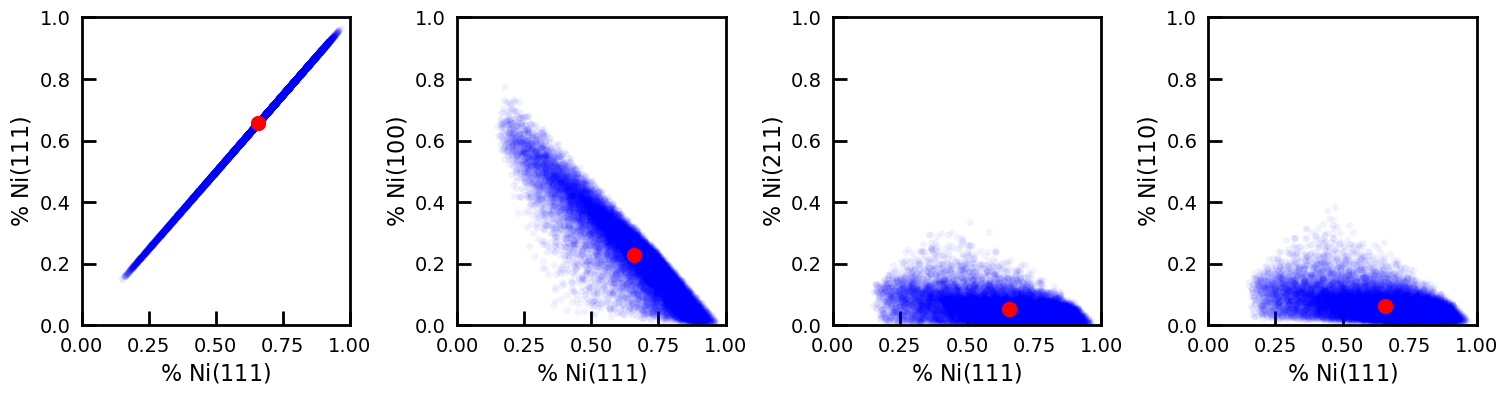

In [12]:
import matplotlib.gridspec as gridspec
plt.rcParams['figure.figsize']=(18,4)

gs=gridspec.GridSpec(nrows=1, ncols=4)
gs.update(wspace=0.4, hspace=0.2)

ax0=plt.subplot(gs[0,0])
ax1=plt.subplot(gs[0,1])
ax2=plt.subplot(gs[0,2])
ax3=plt.subplot(gs[0,3])


ax0.plot(data['111'], data['111'],  color='b', marker='o',    linestyle='None', markersize=5, alpha=0.05,markeredgewidth=0, rasterized=True)
ax0.plot(np.mean(data['111']),np.mean(data['111']), color='r', marker='o')
ax0.set_xlim([0,1])
ax0.set_ylim([0,1])
ax0.set_xlabel('$\mathrm{\%\ Ni(111)}$')
ax0.set_ylabel('$\mathrm{\%\ Ni(111)}$')

ax1.plot(data['111'], data['100'],  color='b', marker='o',    linestyle='None', markersize=5, alpha=0.05,markeredgewidth=0, rasterized=True)
ax1.plot(np.mean(data['111']),np.mean(data['100']), color='r', marker='o')
ax1.set_xlim([0,1])
ax1.set_ylim([0,1])
ax1.set_xlabel('$\mathrm{\%\ Ni(111)}$')
ax1.set_ylabel('$\mathrm{\%\ Ni(100)}$')

ax2.plot(data['111'], data['211'],  color='b', marker='o',    linestyle='None', markersize=5, alpha=0.05,markeredgewidth=0, rasterized=True)
ax2.plot(np.mean(data['111']),np.mean(data['211']), color='r', marker='o')
ax2.set_xlim([0,1])
ax2.set_ylim([0,1])
ax2.set_xlabel('$\mathrm{\%\ Ni(111)}$')
ax2.set_ylabel('$\mathrm{\%\ Ni(211)}$')

ax3.plot(data['111'], data['110'],  color='b', marker='o',    linestyle='None', markersize=5, alpha=0.05,markeredgewidth=0, rasterized=True)
ax3.plot(np.mean(data['111']),np.mean(data['110']), color='r', marker='o')
ax3.set_xlim([0,1])
ax3.set_ylim([0,1])
ax3.set_xlabel('$\mathrm{\%\ Ni(111)}$')
ax3.set_ylabel('$\mathrm{\%\ Ni(110)}$')

plt.savefig('facet_distribution.png', dpi=400, transparent=False, bbox_inches='tight')
plt.show()